# ES27
## Noemi Baruffolo 5^AROB
### machine learning con marziani

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv("csv/marziani.csv")
data.head()

specie colore  n_arti  peso  altezza  larghezza
0  Robby  viola    20.0  3.87    14.77      73.22
1  Robby  viola    27.0  3.15    28.19      88.44
2  Robby  viola    25.0  4.35    12.05      76.74
3  Robby    blu    20.0  3.76     9.90      81.37
4  Robby    blu    28.0  2.86    19.87      84.65

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   specie     2000 non-null   object 
 1   colore     1993 non-null   object 
 2   n_arti     1994 non-null   float64
 3   peso       2000 non-null   float64
 4   altezza    1995 non-null   float64
 5   larghezza  1997 non-null   float64
dtypes: float64(4), object(2)
memory usage: 93.9+ KB


## Preparazione e pulizia dei dati

In [58]:
target = ["specie"]
features = ["n_arti", "peso", "altezza", "larghezza"]

In [59]:
usefulData = data[features + target].dropna()
usefulData.head()

n_arti  peso  altezza  larghezza specie
0    20.0  3.87    14.77      73.22  Robby
1    27.0  3.15    28.19      88.44  Robby
2    25.0  4.35    12.05      76.74  Robby
3    20.0  3.76     9.90      81.37  Robby
4    28.0  2.86    19.87      84.65  Robby

In [60]:
usefulData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   n_arti     1986 non-null   float64
 1   peso       1986 non-null   float64
 2   altezza    1986 non-null   float64
 3   larghezza  1986 non-null   float64
 4   specie     1986 non-null   object 
dtypes: float64(4), object(1)
memory usage: 93.1+ KB


In [61]:
np.unique(usefulData[target])

array(['Robby', 'Simmy'], dtype=object)

In [62]:
specieColori = {"Robby": "Violet", "Simmy": "Blue"}

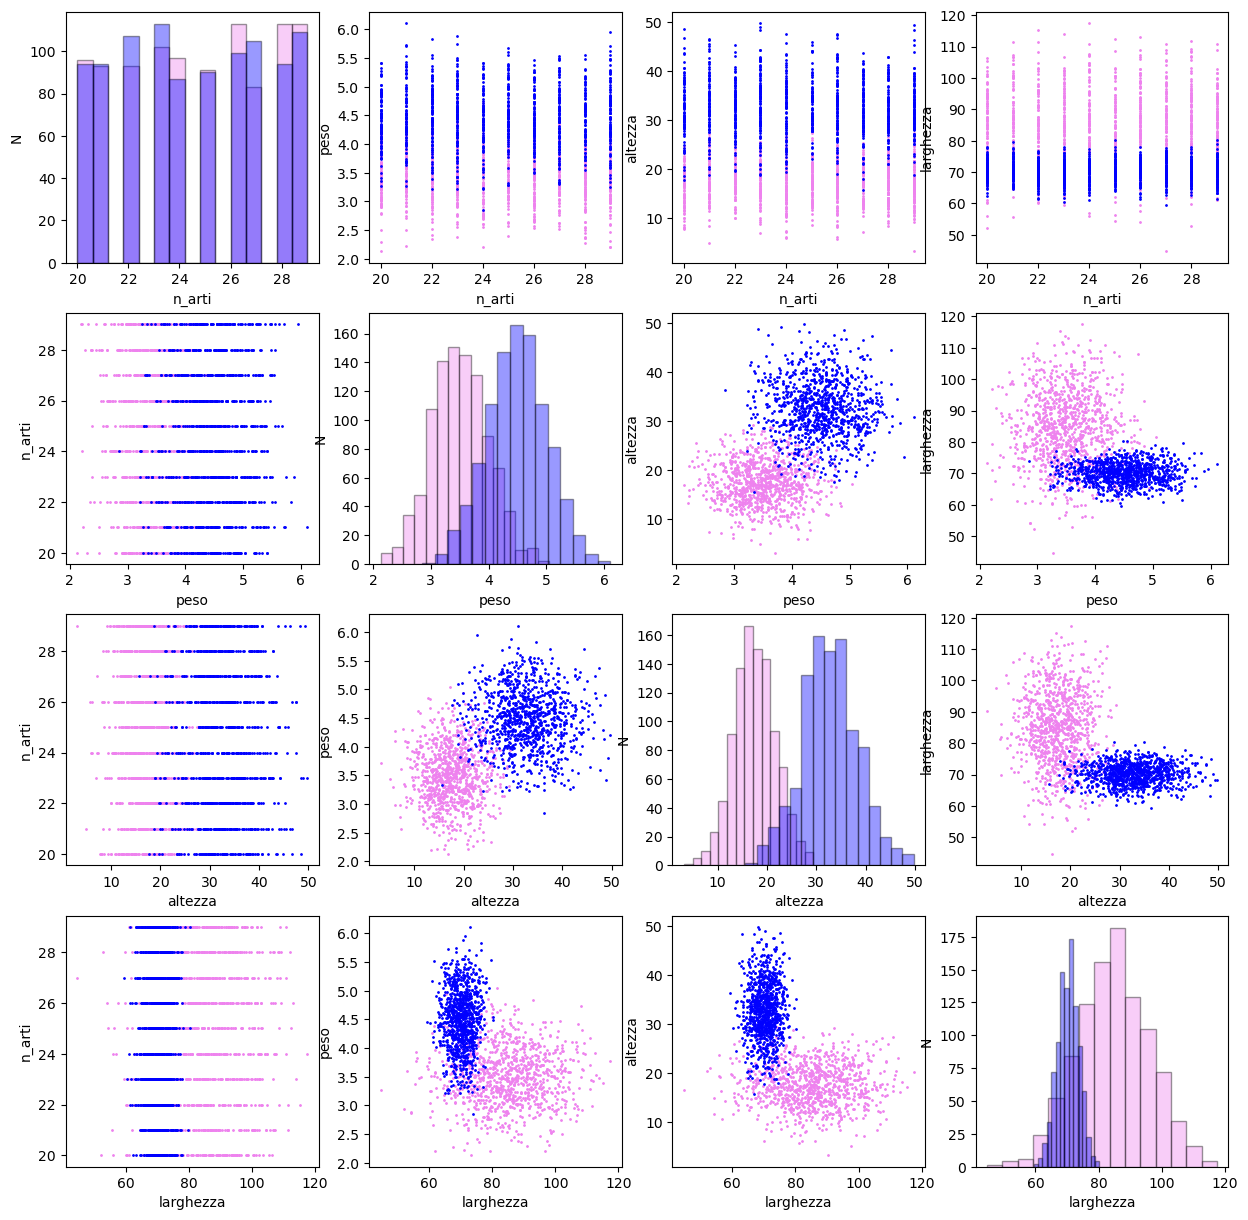

In [78]:
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize = (15, 15))
for i, fI in enumerate(features):
    for j,fJ in enumerate(features):
        if i != j:
            for sp in specieColori:
                filt = usefulData["specie"] == sp
                axs[i, j].scatter(usefulData[filt][fI], usefulData[filt][fJ], s= 1, c = specieColori[sp])
            axs[i, j].set_xlabel(fI)
            axs[i, j].set_ylabel(fJ)
        else:
            for sp in specieColori:
                filt = usefulData["specie"] == sp
                axs[i, j].hist(usefulData[filt][fI], edgecolor = "k", bins = 15, color = specieColori[sp], alpha = 0.4)
            axs[i, j].set_xlabel(fI)
            axs[i, j].set_ylabel("N")
plt.show()

## Suddivisione dei dati in train set e test set

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
X = usefulData[features] #maiuscola perché non è un solo numero, ma n (4 in questo caso)
X

n_arti  peso  altezza  larghezza
0       20.0  3.87    14.77      73.22
1       27.0  3.15    28.19      88.44
2       25.0  4.35    12.05      76.74
3       20.0  3.76     9.90      81.37
4       28.0  2.86    19.87      84.65
...      ...   ...      ...        ...
1995    29.0  4.55    35.48      68.47
1996    23.0  3.84    29.86      71.51
1997    22.0  4.55    29.41      68.38
1998    27.0  4.53    33.12      68.10
1999    23.0  5.10    18.88      64.95

[1986 rows x 4 columns]

In [84]:
y = usefulData[target]
y

specie
0     Robby
1     Robby
2     Robby
3     Robby
4     Robby
...     ...
1995  Simmy
1996  Simmy
1997  Simmy
1998  Simmy
1999  Simmy

[1986 rows x 1 columns]

In [86]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, train_size = 0.7, random_state = 123) #0.7 = 70%dati, 123 come SID, così tutti abbiamo la stessa casuale

## Scelta del modello

In [89]:
from sklearn.neural_network import MLPClassifier

In [91]:
model = MLPClassifier(hidden_layer_sizes = (15, 15, 6), random_state = 987, max_iter = 2000)

## Addestramento della rete neurale

In [94]:
model.fit(XTrain, yTrain.to_numpy().ravel())

MLPClassifier(hidden_layer_sizes=(15, 15, 6), max_iter=2000, random_state=987)

In [96]:
model.score(XTest, yTest) #accuratezza

0.9731543624161074

# Rifacciamo parte della procedura di addestramento partendo però dalla normalizzazione delle feature che prima non abbiamo eseguito (lo abbiamo fatto nell'es26)

In [101]:
X = usefulData[features]
y = usefulData[target]

In [103]:
from sklearn.preprocessing  import StandardScaler, LabelEncoder

In [105]:
featureScaler = StandardScaler()
X_norm = featureScaler.fit_transform(X) #qui stiamo operando su un DataFrame
X_norm

array([[-1.58603875, -0.17611753, -1.13447201, -0.38365309],
       [ 0.8329531 , -1.19672132,  0.33783391,  0.98713702],
       [ 0.14181257,  0.50428499, -1.43288275, -0.0666241 ],
       ...,
       [-0.89489822,  0.78778604,  0.4716799 , -0.81956795],
       [ 0.8329531 ,  0.75943594,  0.87870338, -0.84478616],
       [-0.54932796,  1.56741393, -0.68356461, -1.12849108]])

In [107]:
targetEncoder = LabelEncoder()
y_enc = targetEncoder.fit_transform(y.to_numpy().reshape((-1, 1)).ravel()) #tutte ste mille cose per togliere i warning semplicemente)
y_enc

array([0, 0, 0, ..., 1, 1, 1])

## Suddivisione dei dati di training set e test set

In [110]:
from sklearn.model_selection import train_test_split

In [112]:
Xtrain, Xtest, yTrain, yTest = train_test_split(X_norm, y_enc, test_size = 0.3, random_state = 42)

## Scelta del modello

In [115]:
from sklearn.neural_network import MLPClassifier

In [117]:
model = MLPClassifier(hidden_layer_sizes = (10, 10, 6), random_state = 987, max_iter = 2000) #creo il modello della rete neurale

## Addestramento della rete neurale

In [120]:
model.fit(Xtrain, yTrain)

MLPClassifier(hidden_layer_sizes=(10, 10, 6), max_iter=2000, random_state=987)

## Valutazione del modello

In [123]:
#accuratezza sui dati di test
model.score(Xtest, yTest)

0.9781879194630873

In [125]:
model.score(Xtrain, yTrain)

0.983453237410072

In [127]:
marzianoTest = [[38, 15.6, 205.0, 3700.0]] #mondo feature reali
specieNum = model.predict(featureScaler.transform(marzianoTest)) #capace a prevedere i pinguini data la specie
specieNum

C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [129]:
targetEncoder.inverse_transform(specieNum)

array(['Robby'], dtype=object)